### Simulated Annealing Demonstration
##### Simple program to illustrate the basic principles
#### 30 Sept. 2018, 

#### James B. Cole, Air Force Institute of Technology
#### James.Cole.ctr@afit.edu,   james.b.cole.3142@gmail.com

In [1]:
import math as m
import numpy as np
import random as ra
import matplotlib.pyplot as plt

In [2]:
### basic energy function ###
#
# lambda_m = modulation wavelength, lambda_w = basic signal wavelength
#
A = 10.0   # amplitude factor
#
def Energy0(x,lambda_m,lambda_w):      # general energy function
#
    k_m = 2.0*m.pi/lambda_m
    k_w = 2.0*m.pi/lambda_w
#    
    modulation = np.sin(k_m*x)
    wave = np.sin(k_w*x)
#
    energy = A*modulation*wave
#
    return energy
#

In [3]:
### derivative of basic energy function ###
#
def cos_sin_0(x,lambda_m,lambda_w):
#
    k_m = 2.0*m.pi/lambda_m
    k_w = 2.0*m.pi/lambda_w
#
    dum = k_m * np.cos(k_m * x) * np.sin(k_w * x)
#
    return dum
#
def cos_sin(x,lambda_m,lambda_w):
    dum = cos_sin_0(x,lambda_m,lambda_w) + cos_sin_0(x,lambda_w,lambda_m)
    return dum
#   
def Energy0_p(x,lambda_m,lambda_w):
    dum = cos_sin(x,lambda_m,lambda_w)
    return A * dum
#    

In [4]:
# set parameters, define energy landscape and its derivative
#
lambdaw = 8.0            # set value of lambda_w
lambdam = 16.0*lambdaw   # set value of lambda_m
#
# incorporate set values into general energy function (Energy0)
def Energy(x):
    dum = Energy0(x,lambdam,lambdaw)
    return dum
#
# incorporate set values into general energy derivative function (E0p)
def Energy_p(x):
    dum = Energy0_p(x,lambdam,lambdaw)
    return dum
#
# plot parameters, and lists of values
nx = int(0.5*lambdam)
Delta_x = 0.1
Nx = int( float(nx) / Delta_x )
#
X =   [ i * Delta_x for i in range(0,Nx+1) ]
EL =  [ Energy(i*Delta_x) for i in range(0,Nx+1) ]
EpL = [ Energy_p(i*Delta_x) for i in range(0,Nx+1) ]

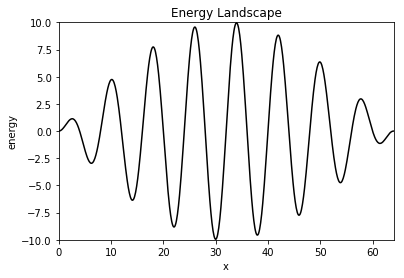

In [5]:
# plot energy landscape
#
plt.plot( X, EL, color = "k",linestyle = "-")
#
plt.xlabel('x')
plt.ylabel('energy')
plt.title("Energy Landscape")
#
plt.xlim(0, Nx*Delta_x )
plt.ylim( -A,A )
#
plt.show()
#

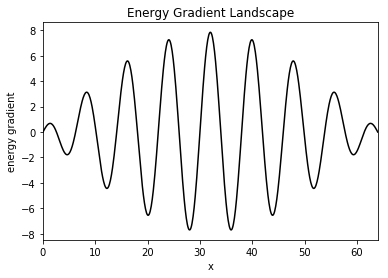

In [6]:
# plot gradient of energy landscape
#
plt.plot( X, EpL, color = "k",linestyle = "-" )
#
plt.xlabel('x')
plt.ylabel('energy gradient')
plt.title("Energy Gradient Landscape")
#
plt.xlim(0, Nx*Delta_x )
#
plt.show()
#

In [7]:
### simple gradient descent ###
#
min_g = 0.01 
#
def grad_desc0(x):
    g = Energy_p(x)
#
    X_gd = [ x ]
    E_gd = [ Energy(x) ]
    G_gd = [ g ]
#
    while abs(g) >= 0.001:
        x = x -  g * Delta_x
        g = Energy_p(x)
#    
        X_gd.append( x )
        E_gd.append( Energy(x) )
        G_gd.append( g )
#           
    return [ X_gd, E_gd, G_gd ]
#  

In [8]:
### gradient descent with noise ### 
#
# random step ranges from -max_s to + max_s 
max_s = 0.25
#
N_trys = 5     # number of random position perturbations 
#             
def grad_desc1(x):
    for i in range(0,N_trys):
        gd  = grad_desc0(x)
#
        rDelta_x = ra.uniform(-max_s,max_s)  # random step
        xgd = gd[0]
        lastx = len(xgd)-1
        x = x + rDelta_x
#
        i = i +1
#           
    return gd
#  

In [9]:
# x0 = 34.0 with min_g = 0.001 is interesting 
#
x0 = 34.0
GD = grad_desc0(x0)
Xgd = GD[0]
Egd = GD[1]

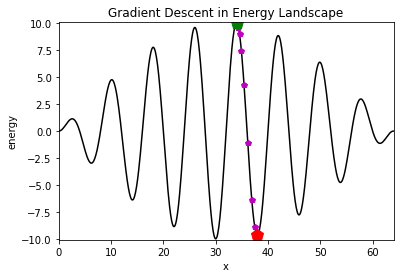

In [10]:
#
plt.plot( X, EL, color = "k",linestyle = "-")
#
plt.xlabel('x')
plt.ylabel('energy')
plt.title("Gradient Descent in Energy Landscape")
#
plt.xlim(0, Nx*Delta_x )
plt.ylim(-A - 0.04, A + 0.04)
#
plt.plot(Xgd, Egd, color = "m",linestyle = "none", marker = "p" )
plt.plot(Xgd[-1], Egd[-1], color = "r",linestyle = "none", marker = "p",markersize = 12 )
plt.plot(Xgd[0],  Egd[0], color = "g",linestyle = "none", marker = "p", markersize = 12 )

#
plt.show()

In [11]:
### generate a random step in a specified range ###
#
def random_step(max_step_size):              
    s = ra.uniform(-max_step_size,+max_step_size)
    s = round(s,1)
    return s
#
### random position with domain of interest
#
def r_position(min_x,max_x):              
    x = ra.uniform(min_x,max_x)
    x = round(x,1)
    return x
#

In [12]:
### estimate mean transition energy ###
#
N_samples   = 100
#
maxstepsize =   8
#
minx = maxstepsize
maxx = Nx*Delta_x - maxstepsize 
#
def rms_Delta_E():
#
    sum = 0.0
#
    for i in range(0,N_samples):
        rx = r_position(minx,maxx)
        rs = random_step(maxstepsize)
#
        rxp = rx + rs
#
        dum = Energy(rxp) - Energy(rx)     # Delta_E
        dum = dum ** 2                     # Delta_E ** 2
# 
        sum = sum + dum
#
    sum = np.sqrt(sum) / float(N_samples)
#
    return sum
#

In [13]:
### mean transition energy ###
#
# use to set reaonable values for the "Boltzmanm constant" and number of iteration at each temparature step
#
rmsDeltaE = rms_Delta_E()
#
print( round(rmsDeltaE,3) )

0.774


#### set simulated annealing parameters 

Transition probability for $ \Delta E > 0$ at temperature $T$ 

\begin{equation*}        
\hspace{-9.0cm}    p(\Delta E,T) = e^{ -\Delta E / k T} .          
\end{equation*}


$ p_{max} = $ acceptance probability for $ \Delta E = \rm{rms} \Delta E $ and $ T = T_{max}$, where  
$ N_T = $ number of iteration at each temparature step, and
$ T_{max} = $ maximum temperature.

Define $ T_{max} = $ and $ k = $ "Boltzmann constant"  in terms of $ p_{max} $ and $ N_T $ by

\begin{align}        
\hspace{-9.0cm}       p_{max} & = p(<\Delta E>,T_{max}),    \\
\hspace{-9.0cm} \frac{1}{N_T} & = p(<\Delta E>,T_{min}),             
\end{align}

where $ T_{min} = $ minimum temperature, and $ p_{min} = 1 / N_T = $ minimum transition probability for 
$ \Delta E = \rm{rms} \Delta E $ and $ T = T_{min}$. 

\begin{align}        
\hspace{-9.0cm}       k & = \frac{<\Delta E>}{T_{min} \log N_T},    \\
\hspace{-9.0cm} T_{max} & = -\frac{T_{min} \log N_T}{\log p_{max} }            
\end{align}

In [14]:
# set N_T_iter, T_min and, p_max   
#
p_max = 0.5                   # set transition probability at T_max for Delta_E = < Delta_E > 
#
nT_iter = 25                  # set number of iterations at each temperature step
p_min = 1.0 / float(nT_iter) 
# 
T_min = 1.0   # set minimum temperature
#
kB = rmsDeltaE / (T_min * np.log(nT_iter) )          # compute Boltzmann constant
#
T_max = - T_min * np.log(nT_iter) / np.log(p_max)    # compute maximum temperature
#
print( 'Boltzmann constant = ', round(kB,1), ', maximum temperature = ',round(T_max,1), ', minimum temperature = ',round(T_min,1) )

Boltzmann constant =  0.2 , maximum temperature =  4.6 , minimum temperature =  1.0


In [15]:
### Transition Probability ###
#
def TransP(Delta_E, T):
#
    dum = -Delta_E / (kB*T)
    dum = np.exp(dum)
    return dum
    

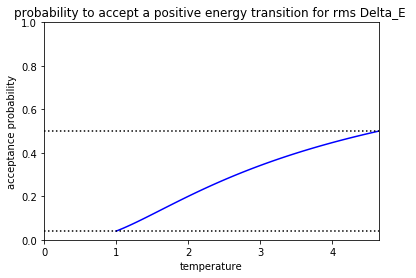

In [16]:
#
nT_steps_p  = 100     # number of temperature steps for plot
#
Delta_T_p = (T_max - T_min) / nT_steps_p                        # for plot 
#
TL_p = [T_min + i*Delta_T_p for i in range(0,nT_steps_p + 1) ]         # list of temperatures for plot
#
pL_p = [ TransP(rmsDeltaE, TL_p[i]) for i in range(0,nT_steps_p + 1) ] # list of probabilities for plot
#
#
plt.plot( TL_p, pL_p, color = "b",linestyle = "-" )
#
plt.axhline(y = p_max, color = "k", linestyle = ":", label='p(rms Delta_E, T_min)')
plt.axhline(y = p_min, color = "k", linestyle = ":", label='p(rms Delta_E, T_min)')
#
plt.xlabel('temperature')
plt.ylabel('acceptance probability')
plt.title("probability to accept a positive energy transition for rms Delta_E ")
#
plt.xlim(0, T_max )
plt.ylim(0.0, 1.0 )

#
plt.show()
#


In [17]:
def accept(Delta_E, T):
    y = TransP(Delta_E, T)
    x = ra.uniform(0.0,1.0)
    if x <= y:
        return 1.0
    else:
        return 0.0
    

In [18]:
accept(0.05, 5.6)

1.0

In [19]:
print('number of iterations at each  temperature = ', nT_iter, )

number of iterations at each  temperature =  25


In [20]:
### set parameters of simulated annealing program ###
#
nT_steps  = 46
#
Delta_T = (T_max - T_min) / float(nT_steps)                     # temperature steps 
#
TL = [T_min + i*Delta_T for i in range(0,nT_steps + 1) ]         # list of temperatures
#
#x0 = r_position(minx,maxx)  # random initial position
x0 = 5.0
#
E0 = Energy(x0)
#
max_random_step_size = 4.0*lambdaw
#
ListX =  [ x0 ]
ListE =  [ E0 ]
#
iTstep = 0

In [21]:
#
### Simulated Annealing Loop ###
#
x = x0
#
while iTstep <= nT_steps: 
#
    i = nT_steps - iTstep 
    Temp = TL[i]
#
    ratio = 1.0 - 0.5 * float(i)/ float(nT_steps)          # gradually decrease random step size
#
    j = 0
#
    while j <= nT_iter: 
#       
        rstep = random_step( max_random_step_size * ratio )
#
        maybe_next_x = x + rstep
        if 0.0 <= maybe_next_x <= Nx*Delta_x:
#
            candidate_next_x =  maybe_next_x
            candidate_next_E = Energy(candidate_next_x)
            DeltaE =  Energy(candidate_next_x) - Energy(x)
            acc = accept(DeltaE, Temp)
            j = j + 1
#
            if acc == 1:
                x = candidate_next_x
                E = candidate_next_E
#
                ListX.append( x )
                ListE.append( E )     
#
    iTstep = iTstep + 1
            

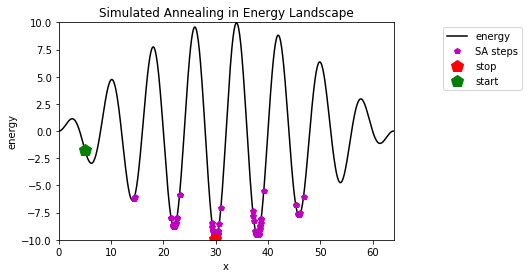

In [22]:
#
plt.plot( X, EL, color = "k",linestyle = "-", label='energy')
#
plt.xlabel('x')
plt.ylabel('energy')
plt.title("Simulated Annealing in Energy Landscape")
#
plt.xlim(0, Nx*Delta_x )
plt.ylim(-A, A)
#
plt.plot(ListX, ListE, color = "m",linestyle = "None", marker = "p", label = 'SA steps' )

plt.plot(ListX[-1], ListE[-1], color = "r",linestyle = "none", marker = "p", markersize = 12, label= 'stop' )
plt.plot(ListX[ 0], ListE[ 0], color = "g",linestyle = "none", marker = "p", markersize = 12, label= 'start' )

plt.xlim(0, Nx*Delta_x )
plt.ylim(-A, A)
#
plt.legend(loc = 0, bbox_to_anchor = (1.4, 1.0))
#
plt.show()

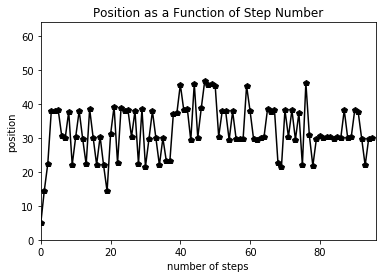

In [23]:
N_ListX = len(ListX)
#
plt.plot( ListX, color = "k", linestyle = "-", marker = "p")
#
plt.xlim(0, N_ListX)
plt.ylim(0, X[-1])
#
plt.xlabel('number of steps')
plt.ylabel('position')
plt.title("Position as a Function of Step Number")
#
plt.show()
#

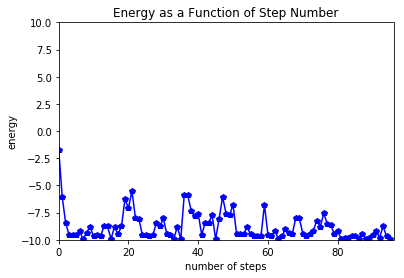

In [24]:
#
plt.plot( ListE, color = "b",linestyle = "-", marker = "p")
#
plt.xlim(0, N_ListX)
plt.ylim(-A, A)
#
plt.xlabel('number of steps')
plt.ylabel('energy')
plt.title("Energy as a Function of Step Number")
#
plt.show()
#

In [25]:
print('number of temperature steps = ',nT_steps, '   number of iterations at each  temperature = ', nT_iter )
print('total number of iterations  = ',nT_steps*nT_iter, ' total number of accepted transitions = ', len(ListX) )

number of temperature steps =  46    number of iterations at each  temperature =  25
total number of iterations  =  1150  total number of accepted transitions =  96


In [26]:
print( 'initial position = ', round(ListX[0],3) , '  initial energy =', round(ListX[0],3) )
print( 'final position   = ', round(ListX[-1],3) , ' final energy   =', round(ListE[-1],3) )
    

initial position =  5.0   initial energy = 5.0
final position   =  29.9  final energy   = -9.916
